
#           **MACHINE LEARNING - LINEAR REGRESSION ASSIGNMENT**


## Problem Statement

   A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

   A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

   In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

   The company wants to know:

   1. Which variables are significant in predicting the demand for shared bikes.
   1. How well those variables describe the bike demands

## Methodologies used

   * Sklearn
   * Statsmodel
   * Linear Regression
   * R2 Score
   * Variance Inflation Factor

## Contents

   1. Importing necessary library functions
   2. Loading the Dataset and take a glance
   3. Sanity Checks
   4. Exploratory Data Analysis
   5. Dummy Variables
   6. Model Selection and Building
   7. Residual Analysis
   8. R2 Score
   9. Root Mean Squared Error
   9. Conclusion and recommendations

## Importing necessary library functions

In [1]:
# Importing required libraries into this notebook for convenience

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import calendar as cld

# Importing warnings and setting up it to ignore to get rid off any warnings

import warnings as wr
wr.filterwarnings("ignore")

# Creating a DF with all the above mentioned libraries with its version used

version = [['Numpy',np.__version__],['Pandas',pd.__version__],['Matplotlib',mpl.__version__],['Seaborn',sns.__version__]]
pack = pd.DataFrame(version,columns=['Package Name','Version'],index=[1,2,3,4])

pack

,Package Name,Version
1,Numpy,1.18.1
2,Pandas,1.0.5
3,Matplotlib,3.3.0
4,Seaborn,0.10.0


## Loading the Dataset and take a glance

In [2]:
# Loading the Dataset and printing the top 10 rows to have an initial impression about the data

Bike_sharing = pd.read_csv("day.csv",header=0)
Bike_sharing.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


From seeing the glimpse of data given in the DF, it is clear the some column names are not fine enough to interpret

In [3]:
# Renaming some columns to have a proper look

columns_rename = {'dteday':'date','yr':'year','mnth':'month','weathersit':'weatherSituation','temp':'temperature','atemp':'adjustedTemperature','hum':'humidity','cnt':'count'}
Bike_sharing.rename(columns=columns_rename,inplace=True)
Bike_sharing.columns

Index(['instant', 'date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weatherSituation', 'temperature', 'adjustedTemperature',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

Column names are renamed in a way better to understand and proceed further

## Sanity Checks

In [4]:
# Performing sanity check to get to know if any null values and datatypes of the columns in the DF

Bike_sharing.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   instant              730 non-null    int64  
 1   date                 730 non-null    object 
 2   season               730 non-null    int64  
 3   year                 730 non-null    int64  
 4   month                730 non-null    int64  
 5   holiday              730 non-null    int64  
 6   weekday              730 non-null    int64  
 7   workingday           730 non-null    int64  
 8   weatherSituation     730 non-null    int64  
 9   temperature          730 non-null    float64
 10  adjustedTemperature  730 non-null    float64
 11  humidity             730 non-null    float64
 12  windspeed            730 non-null    float64
 13  casual               730 non-null    int64  
 14  registered           730 non-null    int64  
 15  count                730 non-null    int

While observing the results from info functions, we can say that there are no columns with null values

In [5]:
# Using the describe function, gathering the descriptive statistics of all the columns

Bike_sharing.describe()

,instant,season,year,month,holiday,weekday,workingday,weatherSituation,temperature,adjustedTemperature,humidity,windspeed,casual,registered,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Observing most of the columns seem to be have the numeric values, some shows the values like categorical columns. Have to understand and change the datatypes of the columns if needed 

## Exploratory Data Analysis

In [6]:
# Printing the number of values present in those particular columns

print(Bike_sharing.season.value_counts())
print(Bike_sharing.weatherSituation.value_counts())
print(Bike_sharing.month.value_counts())
print(Bike_sharing.weekday.value_counts())

3    188
2    184
1    180
4    178
Name: season, dtype: int64
1    463
2    246
3     21
Name: weatherSituation, dtype: int64
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: month, dtype: int64
2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64


Exploration and from the Data Dictionary for the data, we found the columns ___season, weatherSituation, month___ and ___weekday___ are categorical in nature. so we yet to transform and make it as the object type. 

In [7]:
#Transforming the season column with appropraite values

season_codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
Bike_sharing['season'] = Bike_sharing['season'].map(season_codes)

#Transforming the weatherSituation column with appropraite values

weather_codes = {1:'Clear',2:'Cloudy',3:'Rainy',4:'Heavy Rain'}
Bike_sharing['weatherSituation'] = Bike_sharing['weatherSituation'].map(weather_codes)

#Transforming the month column with appropraite values

mnth_codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
Bike_sharing['month'] =Bike_sharing.month.map(mnth_codes)

#Transforming the weekday column with appropraite values from the year 2018

def weekday_map(x):
    return cld.day_name[x]

Bike_sharing.weekday = Bike_sharing.weekday.apply(weekday_map)

After considering the columns with categorical values, they are transformed in order to produce better results with appropraite values

## Uni-variate Analysis

In [8]:
# Defining the function in view of producing more plots to understand the univariates

def univariate_cat(x):
    plt.figure(figsize=(15,5))
    sns.countplot(x=x, data=Bike_sharing,palette='cool')
    plt.suptitle(x.title()+" vs Total Count")
    plt.xlabel(x.title())
    plt.ylabel('Total Count of Bikes Shared')
    plt.show()

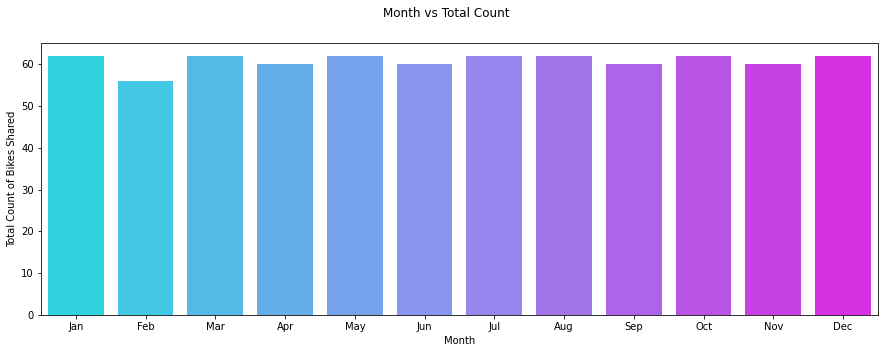

In [9]:
# Passing the values with the created function

univariate_cat(x="month")

__Insights from the above plot:__

   1. Months like December, October, August and July holds the more number of people rided shared from this particular company
   2. February is the month having lowest number among

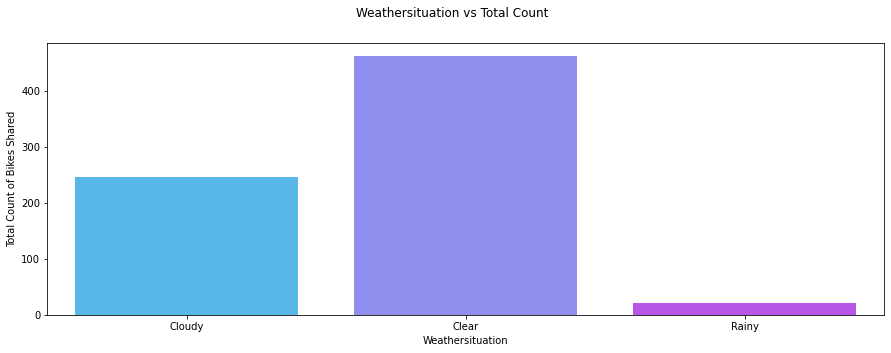

In [10]:
# Passing the values with the created function

univariate_cat(x="weatherSituation")

__Insights from the above plot:__

   1. Clear Weather people preferred to take the shared bikes from the company, followed by the weather Cloudy
   2. Rainy weather mighy made the people not to approach the company

In [11]:
# Defining the function in view of producing more plots to understand the univariates

def univariate_cont(x):
    plt.figure(figsize=(15,5))
    sns.distplot(Bike_sharing[x],bins=30)
    plt.suptitle(x.title()+" vs Total Count")
    plt.xlabel(x.title())
    plt.ylabel('Total Count of Bikes Shared')
    plt.show()

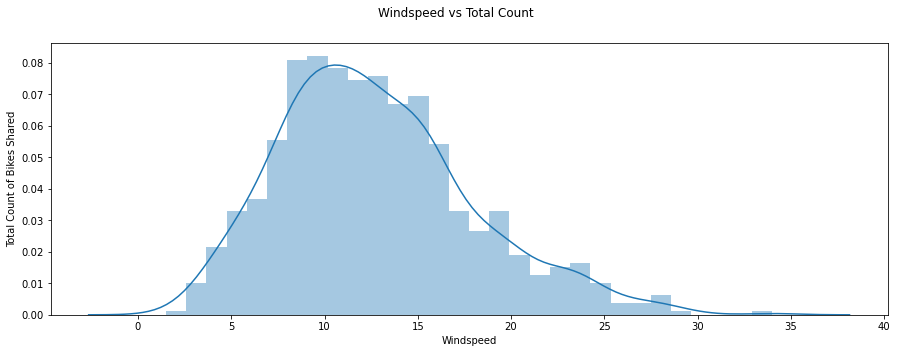

In [12]:
# Passing the values with the created function

univariate_cont("windspeed")

__Insights from the above plot:__

   1. Windspeed value of 10 - 12 holds the higher number of bikes shared, whereas the bikes shares getting decreased with increasing in windspeed
   2. Plot produced the left skewed distribution,which means this column is not normally distributed

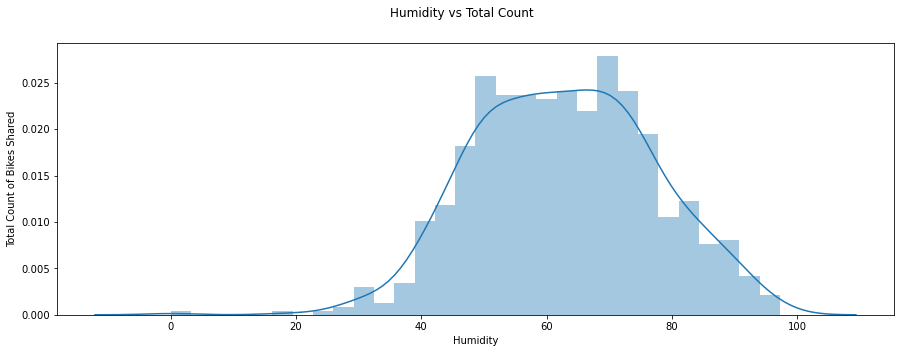

In [13]:
# Passing the values with the created function

univariate_cont("humidity")

__Insights from the above plot:__

   1. Humidity value of 60 - 70 holds the higher number of bikes shared, whereas the bikes shares getting decreased with increasing/decreasing in humidity
   2. Plot produced the right skewed distribution,which means this column is not normally distributed

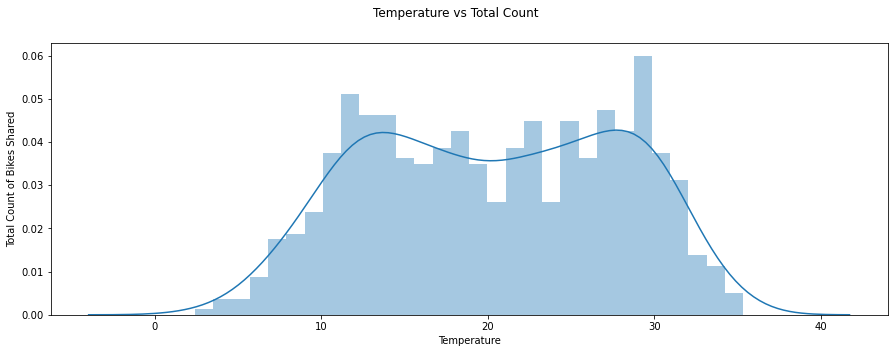

In [14]:
# Passing the values with the created function

univariate_cont("temperature")

__Insights from the above plot:__

   1. Temperature value of 14 and 28 holds the higher number of bikes shared, whereas the bikes shares getting decreased with increasing/decreasing in humidity. Indeed it produces 'two-hump' distributions with lower occupied numbers between 15 and 25
   2. Plot produced the 'two-humped' distribution,which means this column is not normally distributed`

## Bi-variate Analysis

In [15]:
# Defining the function in view of producing more plots to understand the bivariates

def bivariate_cat(x,hue=None):
    plt.figure(figsize=(15,5))
    sns.barplot(x=x, y="count", hue=hue, data=Bike_sharing,palette='cool')
    plt.legend(loc=0,title=hue.title())
    plt.suptitle(x.title()+" vs Total Count in view of "+hue.title())
    plt.xlabel(x.title())
    plt.ylabel('Total Count of Bikes Shared')
    plt.show()

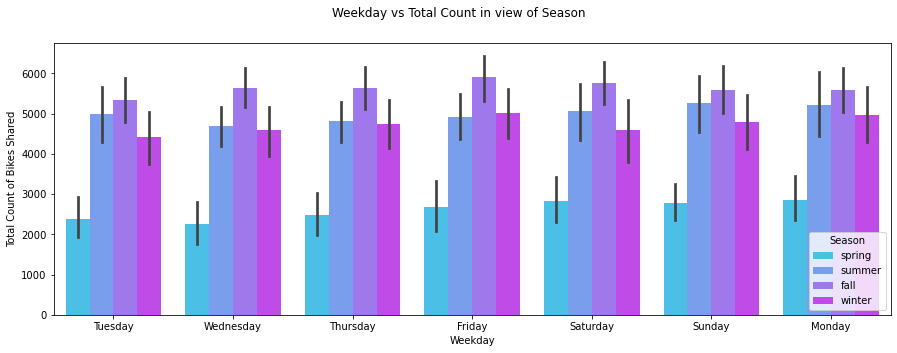

In [16]:
# Passing the distinct values with the created function

bivariate_cat(x='weekday',hue='season')

__Insights from the above plot:__

   1. Fall is the most popular season people interested to go for shared bikes, followed by summer occupies the place
   2. Fall Weekends are having more demands, followed by summer weekends. And spring is the season people used not to get the bikes

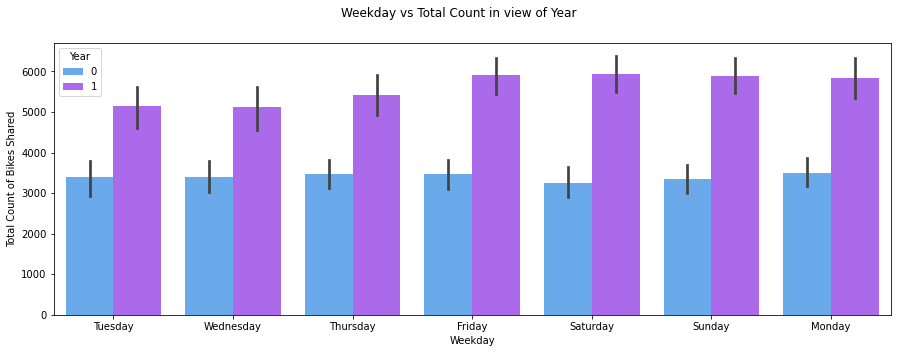

In [17]:
# Passing the distinct values with the created function

bivariate_cat(x='weekday',hue='year')

__Insights from the above plot:__

   1. Saturday is the most popular day people interested to go for shared bikes in 2019,whereas Monday in 2018 holded the first
   2. Bike demand has been increasing by numbers from year to year. People did not take more bikes in 2018 overall, but 2019 weekends people preferred to stand in the queue

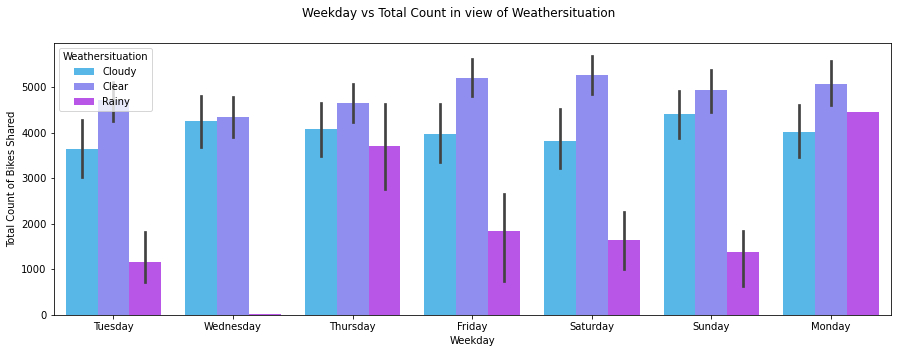

In [18]:
# Passing the distinct values with the created function

bivariate_cat(x='weekday',hue='weatherSituation')

__Insights from the above plot:__

   1. Clear Weekends strikes the customers to come for bikes in the company, followed by the Cloudy Weekends
   2. Indeed, Rainy Monday and Rainy Thursday holds the higher in the rainy weather

In [19]:
# Defining the function in view of producing more plots to understand the bivariates

def bivariate_cat(x,y,hue=None):
    plt.figure(figsize=(15,5))
    sns.scatterplot(x=x, y=y, hue=hue, data=Bike_sharing,palette='cool')
    plt.legend(loc=0,title=hue.title())
    plt.suptitle(x.title()+" vs "+y.title()+" in view of "+hue.title())
    plt.xlabel(x.title())
    plt.ylabel(y.title())
    plt.show()

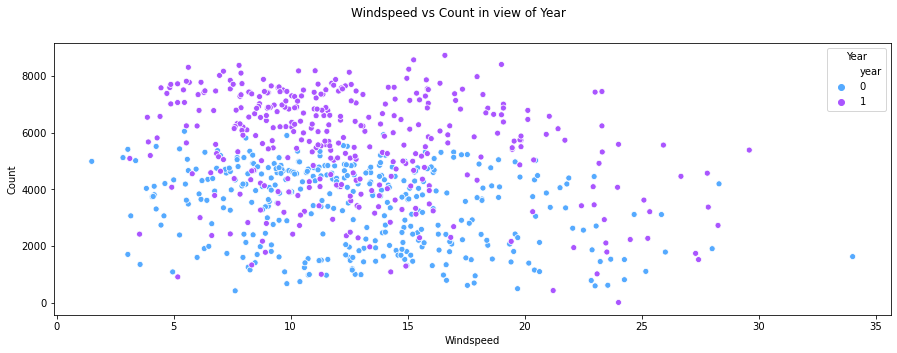

In [20]:
# Passing the distinct values with the created function

bivariate_cat(x='windspeed',y='count',hue='year')

__Insights from the plot:__

   1. Windspeed in the year 2018 reached upto 34 , whereas it is fine in 2019 inline with the temperature
   2. Highest count hit in 2019 compared to 2018 with the windspeed of 17 

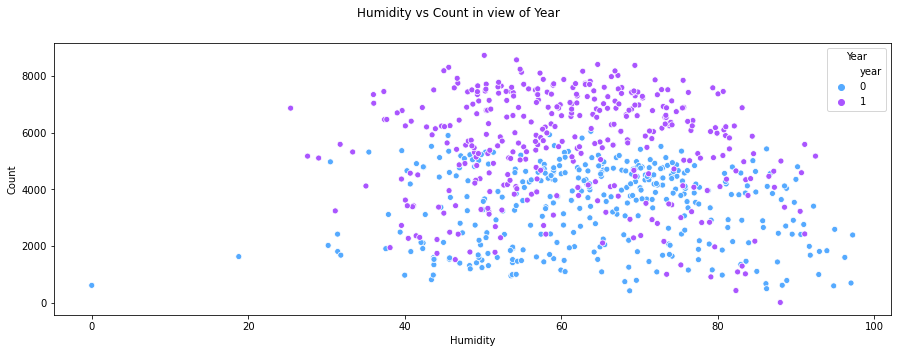

In [21]:
# Passing the distinct values with the created function

bivariate_cat(x='humidity',y='count',hue='year')

__Insights from the plot:__

   1. Humidity in the year 2019 fallen upto 0(which seems to be some errored data) , whereas it is fine in 2019 inline with the count
   2. When the humidity was 50, the count has gone upto 8000+ and also humidity in 2019 seems to be higher.

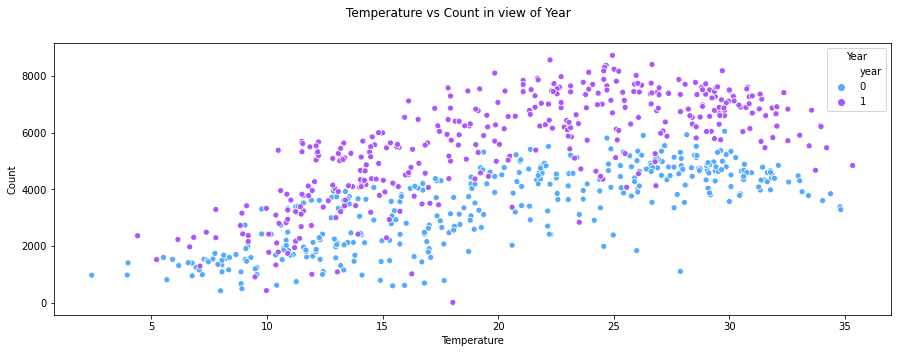

In [22]:
# Passing the distinct values with the created function

bivariate_cat(x='temperature',y='count',hue='year')

__Insights from the plot:__

   1. Temperature versus Count shows a very widespread data, which means the data may have a good correlation with each other
   2. When temperature was low below 5, the count also lesser. On the flip side, when temperature was 25 count has gone more than 8000

## Multi-variate Analysis

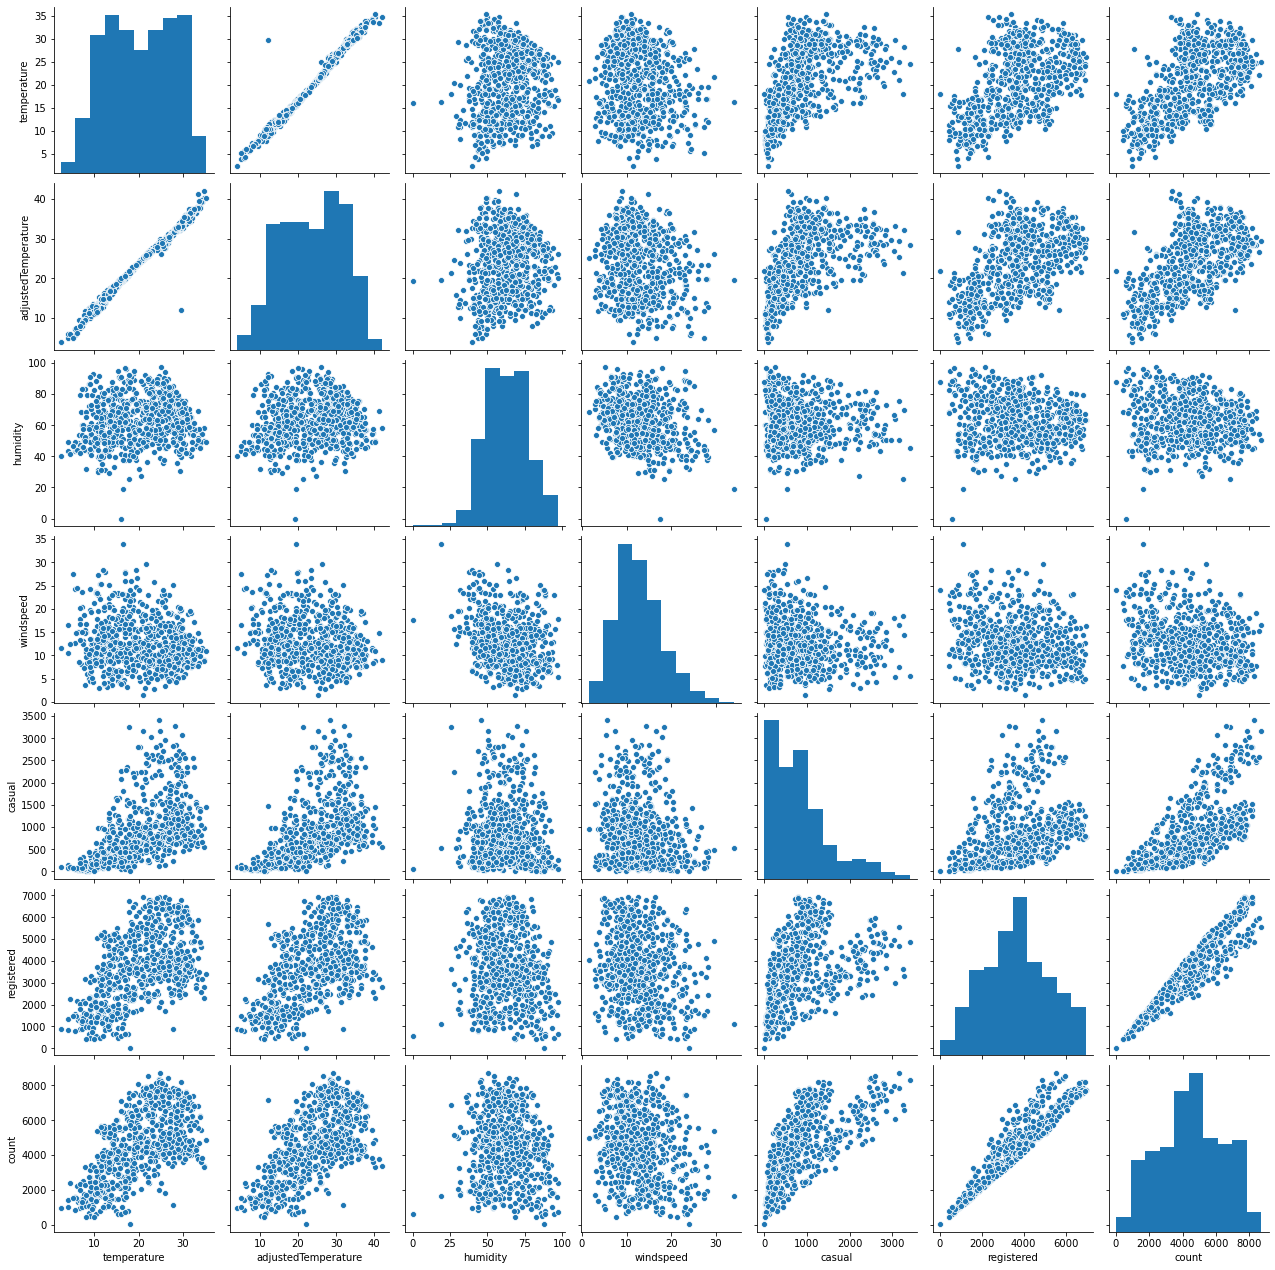

In [23]:
# Taking out some of the variables and producing the pairplot to view the correlation with target variable

variables = ['temperature','adjustedTemperature','humidity','windspeed','casual','registered','count']
sns.pairplot(data=Bike_sharing,x_vars= variables,y_vars=variables,)
plt.show()

__Insights from the plot:__

   1. The very first inference is there is a very high correlation between temperature and adjustedTemperature, further we found that adjustedTemperature is just the real feel value of temperature.Followed by that, casual and count have a good correlation with the temperature variable
   2. Seems the correlation between temperature and humidity is normally distributed,other variables are not that great in correlation with humidity
   3. The correlation between temperature and windspeed is normally distributed,other variables are not that great in correlation with windspeed
   4. There are good correlations between casual , registered and count, and we also know that count is the sum of casual and registered value.
   5. Count has a good correlation with temperature, other variables are not that great with count.

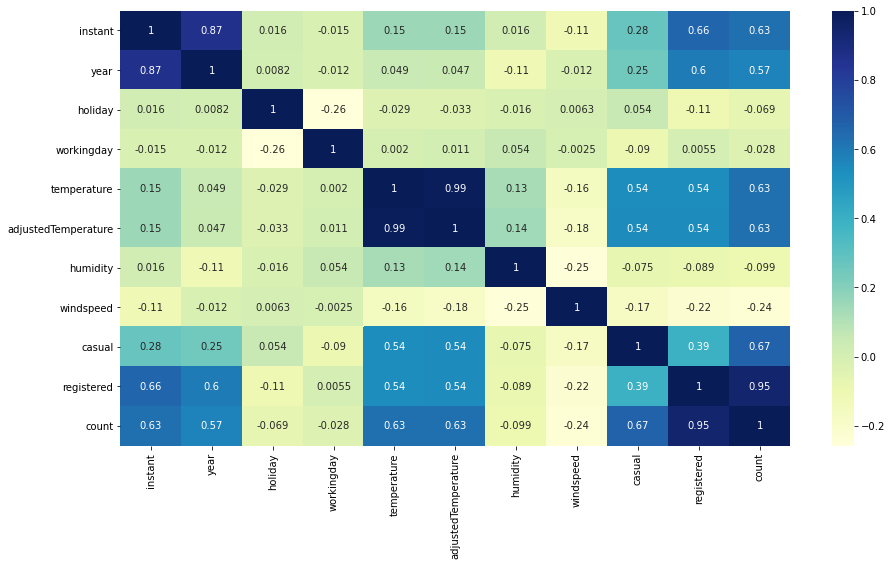

In [24]:
# Plotting the heatmap with the DF correlation so as to understand the data more specifically

plt.figure(figsize = (15,8))
sns.heatmap(Bike_sharing.corr(),annot=True,cmap='YlGnBu')
plt.show()

__Insights from the plot:__

   1. Correlation Matrix shows there is a very good correlation between instant and year, where instant is just a row id
   2. Holiday is inversely correlated with working day and registered
   3. Temperature and adjustedTemperature are deeply correlated as we know both the values shares themselves. 
   4. There is a positive good correlation between count and Temperature also, the same applicable for adjustedtemperature column too
   5. Humidity is negatively correlated with windspeed , windspeed is inversely with mostly all variables except holiday
   6. Count is the sum of casual and registered column, and is highly correlated with temperature, year and instant

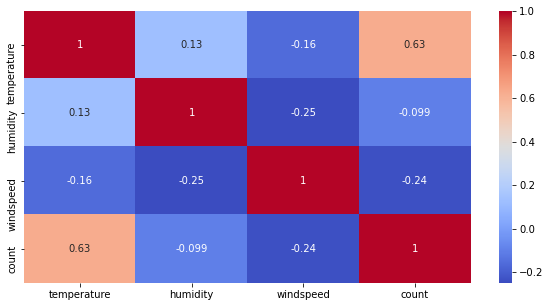

In [25]:
# Correlation of numerical values to understand the features

Bike_sharing_1 = Bike_sharing[['temperature','humidity','windspeed','count']]
plt.figure(figsize=(10,5))
sns.heatmap(Bike_sharing_1.corr(),cmap = 'coolwarm',annot=True)
plt.show()

__Insights from the plot:__

   1. Correlation Matrix shows there is a moderate correlation between count and temperature, where count is a combination of registered and casual columns
   2. Windspeed is inversely correlated with humidity ,count and temperature
   3. Humidity and temperature are having a positive correlation

## Dummy Variables

In [26]:
# Creating a DF which would contain the dummy variables for season, weatherSituation, month and weekday

dummy_variables = pd.get_dummies(Bike_sharing[['season','weatherSituation','month','weekday']],drop_first=True)

In [27]:
# Looking at the dummies DF

dummy_variables.head()

,season_spring,season_summer,season_winter,weatherSituation_Cloudy,weatherSituation_Rainy,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,...,month_May,month_Nov,month_Oct,month_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


There are totally 4 season , 3 weather Situation, 12 months, and 7 weekdays as we know and gathered info from the dataset.

so the dummies would be :

If m is ___DUMMY VARIABLES COUNT FROM A CATEGORY VARIABLE___ and n is ___TOTAL NUMBER OF CATEGORIES IN THE CATEGORICAL VARIABLE___,then 
                                                    
<div align="center"><b>m = n – 1</b></div>

                                
   * Season = 4 - 1 = 3 dummy variables
   * Weather = 3 - 1 = 2 dummy variables
   * Months = 12 - 1 = 11 dummy variables
   * Weekdays = 7 - 1 = 6 dummy variables
   
   * Total = 3 + 2 + 11 + 6 = 22 dummy variables.
   
Hence, we can see the 22 columns of dummy variables for 4 categorical variables

In [28]:
# Concatenation of Bike_sharing DF and dummy_variables DF 

Bike_share=pd.concat([Bike_sharing,dummy_variables],axis=1)

In [29]:
# Checking if concatenation happened perfectly

Bike_share.head()

,instant,date,season,year,month,holiday,weekday,workingday,weatherSituation,temperature,...,month_May,month_Nov,month_Oct,month_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,1,01-01-2018,spring,0,Jan,0,Tuesday,1,Cloudy,14.110847,...,0,0,0,0,0,0,0,0,1,0
1,2,02-01-2018,spring,0,Jan,0,Wednesday,1,Cloudy,14.902598,...,0,0,0,0,0,0,0,0,0,1
2,3,03-01-2018,spring,0,Jan,0,Thursday,1,Clear,8.050924,...,0,0,0,0,0,0,0,1,0,0
3,4,04-01-2018,spring,0,Jan,0,Friday,1,Clear,8.200000,...,0,0,0,0,0,0,0,0,0,0
4,5,05-01-2018,spring,0,Jan,0,Saturday,1,Clear,9.305237,...,0,0,0,0,0,1,0,0,0,0


In [30]:
# Removing the category variables which are transformed as dummy variables

Bike_share.drop(['season','month','weekday','weatherSituation'],axis=1,inplace=True)

In [31]:
# Removing the columns instant and date as it does not value for our model

Bike_share.drop(['instant','date'],axis=1,inplace=True)

In [32]:
# Checking the columns if the above code executed properly

Bike_share.columns

Index(['year', 'holiday', 'workingday', 'temperature', 'adjustedTemperature',
       'humidity', 'windspeed', 'casual', 'registered', 'count',
       'season_spring', 'season_summer', 'season_winter',
       'weatherSituation_Cloudy', 'weatherSituation_Rainy', 'month_Aug',
       'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun',
       'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

## Model Selection and Building

In [33]:
# Importing the train test split function to handover the DF to sklearn to process

from sklearn.model_selection import train_test_split

# Adding the below line to specify the train_test_split to use always the same set of train and test
np.random.seed(0)

# Providing the parameters and splitting the DF respectively
train_set,test_set = train_test_split(Bike_share,train_size = 0.7, test_size = 0.3, random_state=219)

___train_test_split___ will split the DF as 70% for train data and 30% for test data respectively with the ___random_state = 219___

In [34]:
# Observing the shape of train and test set

print(train_set.shape,test_set.shape)

(510, 32) (219, 32)


In [35]:
# A glimpse of train set with 5 top rows

train_set.head()

,year,holiday,workingday,temperature,adjustedTemperature,humidity,windspeed,casual,registered,count,...,month_May,month_Nov,month_Oct,month_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
425,1,0,0,14.486653,17.99210,65.7083,9.708568,246,2948,3194,...,0,0,0,0,0,0,1,0,0,0
384,1,0,0,8.917500,11.04790,45.0000,13.584250,115,3048,3163,...,0,0,0,0,1,0,0,0,0,0
442,1,0,1,22.345000,26.64105,72.8750,10.875239,982,5171,6153,...,0,0,0,0,0,0,0,0,0,1
687,1,0,1,15.614153,18.78105,62.3333,15.749489,449,5050,5499,...,0,1,0,0,0,0,0,0,0,1
325,0,0,1,17.083347,21.08480,96.2500,7.959064,69,1538,1607,...,0,1,0,0,0,0,0,0,0,0


### Scaling 

In [36]:
# Importing the Min Max Scaler scaling to normalize the column values

from sklearn.preprocessing import MinMaxScaler

# Initiating the object
scaler = MinMaxScaler()

# Taking the numerical variables along to scale
numeric_variables = ['temperature', 'humidity', 'windspeed','casual','registered','count','adjustedTemperature']

# Using fit_transform function to scale the numerical variables provided
train_set[numeric_variables] = scaler.fit_transform(train_set[numeric_variables])

Numerical variables have been taken as a list and passed as the columns in the scaler function except the scaled and the two binary variables out there in the DF

In [37]:
# A glimpse of train set with 5 top rows

train_set.head()

,year,holiday,workingday,temperature,adjustedTemperature,humidity,windspeed,casual,registered,count,...,month_May,month_Nov,month_Oct,month_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
425,1,0,0,0.334881,0.349257,0.597981,0.252566,0.075077,0.422755,0.371733,...,0,0,0,0,0,0,1,0,0,0
384,1,0,0,0.157154,0.161382,0.334041,0.371818,0.034769,0.437193,0.368100,...,0,0,0,0,1,0,0,0,0,0
442,1,0,1,0.585664,0.583253,0.689325,0.288463,0.301538,0.743719,0.718505,...,0,0,0,0,0,0,0,0,0,1
687,1,0,1,0.370863,0.370602,0.554965,0.438441,0.137538,0.726249,0.641861,...,0,1,0,0,0,0,0,0,0,1
325,0,0,1,0.417749,0.432930,0.987254,0.198734,0.020615,0.219174,0.185749,...,0,1,0,0,0,0,0,0,0,0


In [38]:
# A view of descriptive analysis of train_set DF

train_set.describe()

,year,holiday,workingday,temperature,adjustedTemperature,humidity,windspeed,casual,registered,count,...,month_May,month_Nov,month_Oct,month_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.523529,0.031373,0.670588,0.528932,0.512239,0.564623,0.342853,0.267113,0.535132,0.536088,...,0.084314,0.082353,0.086275,0.090196,0.154902,0.117647,0.149020,0.149020,0.150980,0.133333
std,0.499936,0.174494,0.470461,0.235611,0.216159,0.175805,0.157003,0.210037,0.228666,0.229739,...,0.278131,0.275172,0.281045,0.286744,0.362166,0.322506,0.356457,0.356457,0.358381,0.340268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.321797,0.326407,0.435740,0.229473,0.101000,0.365146,0.371382,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545321,0.543967,0.563462,0.323711,0.228154,0.540283,0.542658,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.730408,0.686190,0.690255,0.432689,0.346000,0.708779,0.718124,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


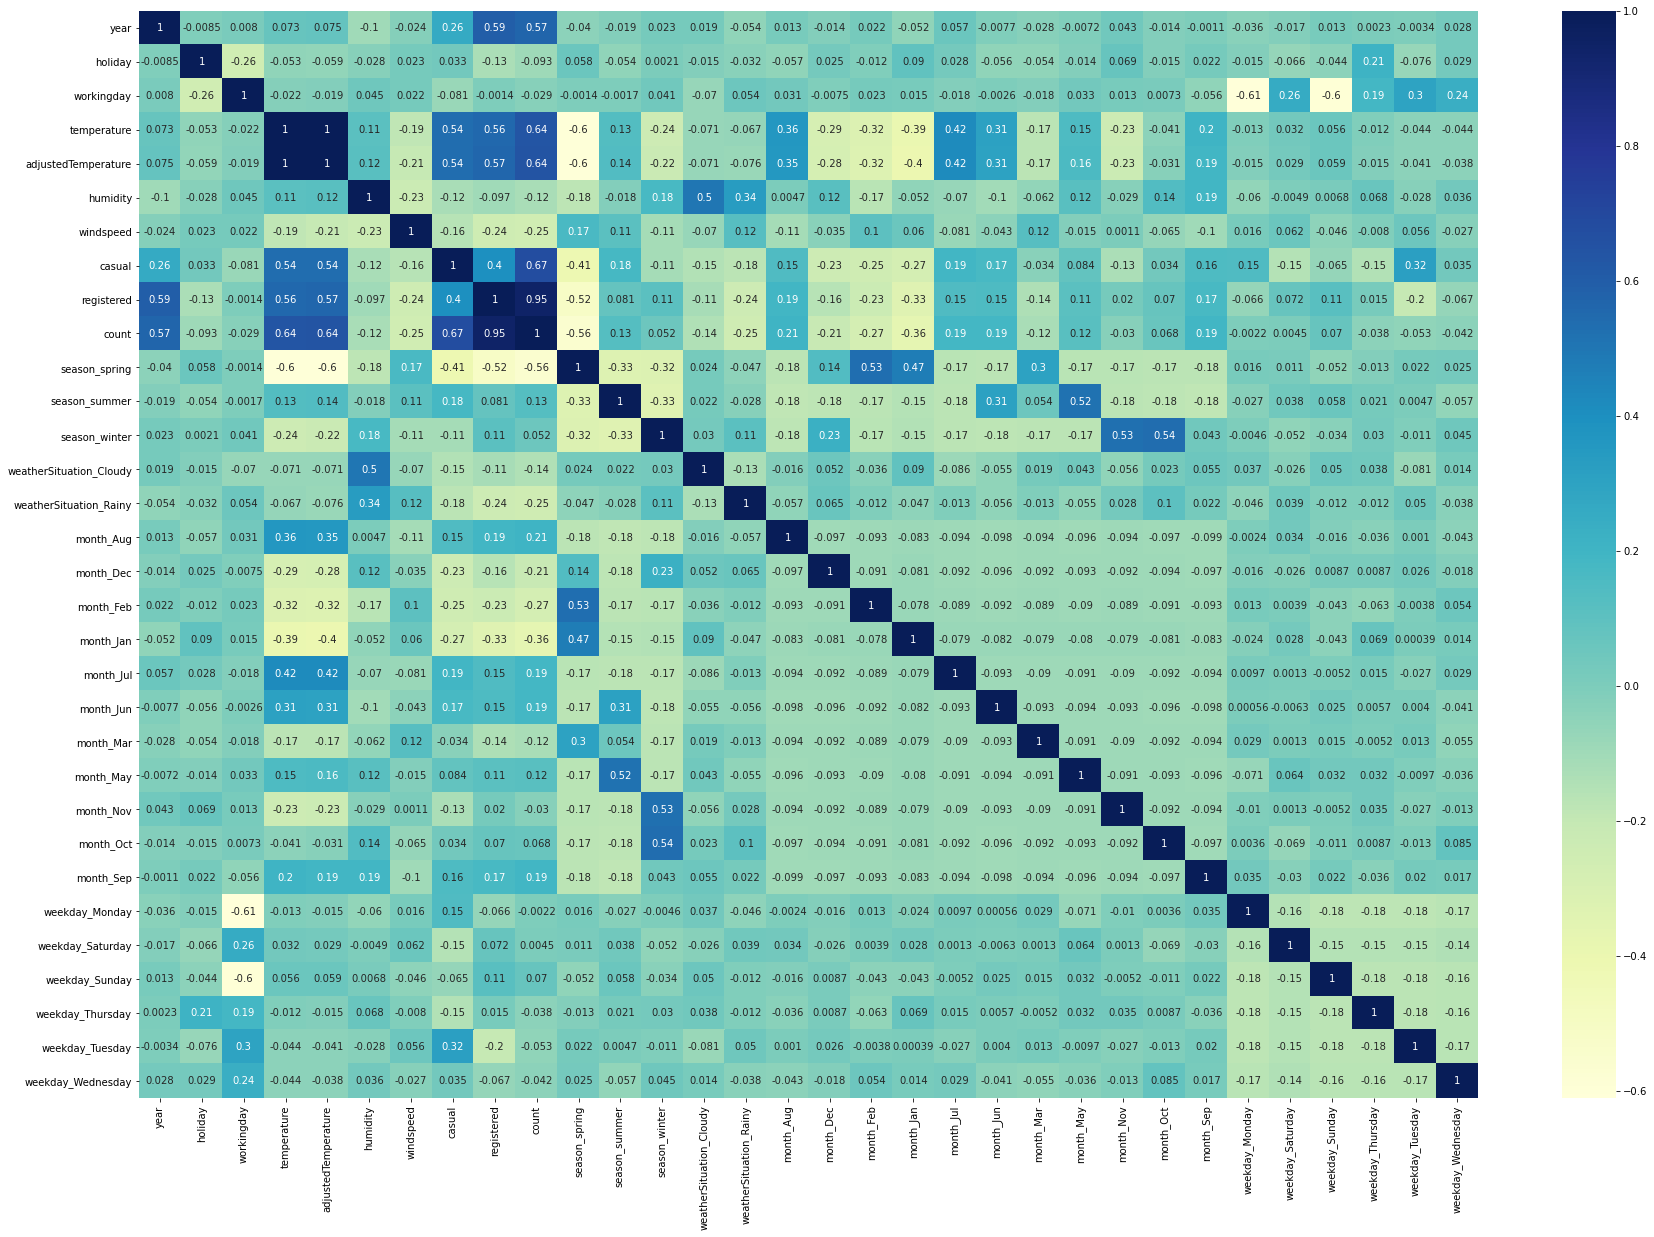

In [39]:
# Checking the correlation matrix to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(train_set.corr(), annot = True, cmap="YlGnBu")
plt.show()

___Insights from the above plot:___
   1. Apart from the already present variables, the dummy variables are added here so as to find the multicollinearity
   2. Season spring has a good correlation with the month February, like wise spring has corrrelation with January too
   3. Season winter has a good correlation with the month October, like wise spring has corrrelation with November too
   4. Temperature has a good correlation with July month
   
   5. Casual user preferred more Tuesdays to ride the shared bikes

From the above correlation matrix, it is clear that ___temperature___ is the moderately correlated value. so will plot it with ___count___ to see the correlation better

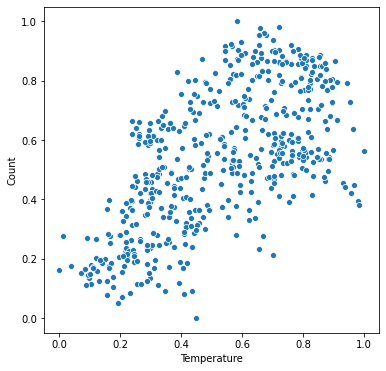

In [40]:
# Plotting the scatter plot to view the correlation of temperature with count variable after building the model

plt.figure(figsize=[6,6])
sns.scatterplot(x=train_set.temperature, y=train_set['count'],palette='cool')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

In [41]:
# Filtering the train_set DF to set variables X y 

# Setting up the count column as the TARGET Variable
y_train = train_set.pop('count')

# Setting the rest of the DF with X(independent variables)
X_train = train_set.drop(['adjustedTemperature','casual','registered'],axis=1)

In the above cell, for ___X_train___ some columns such as _adjustedTemperature, casual_ and _registered_ which are redundant values dropped in order to build the perfect model

In [42]:
# A check of the DF

X_train.head()

,year,holiday,workingday,temperature,humidity,windspeed,season_spring,season_summer,season_winter,weatherSituation_Cloudy,...,month_May,month_Nov,month_Oct,month_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
425,1,0,0,0.334881,0.597981,0.252566,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
384,1,0,0,0.157154,0.334041,0.371818,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
442,1,0,1,0.585664,0.689325,0.288463,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
687,1,0,1,0.370863,0.554965,0.438441,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
325,0,0,1,0.417749,0.987254,0.198734,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


## Building the linear model

In [43]:
# Importing Stats model
import statsmodels.api as sm

# Adding a constant explicitly to avoid the line passing thru origin
X_train_linear_model0 = sm.add_constant(X_train[['temperature']])

# Create a first fitted model to see how the line is getting fitted
linear_model0 = sm.OLS(y_train, X_train_linear_model0).fit()

In [44]:
# Looking for parameters such as Slope and Intercept

linear_model0.params

const          0.208088
temperature    0.620118
dtype: float64

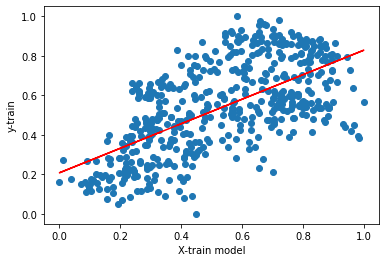

In [45]:
# Plotting the scatter plot with temperature variable

plt.scatter(X_train_linear_model0.iloc[:, 1], y_train)

# Plotting a regression line to see the fit using the linear formula y = beta0+beta1*x
plt.plot(X_train_linear_model0.iloc[:, 1], linear_model0.params[0] + linear_model0.params[1]*X_train_linear_model0.iloc[:, 1], 'r')
plt.xlabel("X-train model")
plt.ylabel("y-train")
plt.show()

The above plot shows how best our regression line fit the model with the intercept value from _0.17_

### Statsmodels Linear model 

In [46]:
# Importing the stats model
import statsmodels.api as sm

# Adding the constant with respect to all the variables available in the set
X_train_linear_model00 = sm.add_constant(X_train)

# Fitting the model using Ordinary least Square method
linear_model00 = sm.OLS(y_train,X_train_linear_model00).fit()

# Printing the parameters 
linear_model00.params

const                      0.442846
year                       0.234830
holiday                   -0.106644
workingday                -0.060463
temperature                0.425795
humidity                  -0.139550
windspeed                 -0.177944
season_spring             -0.103041
season_summer              0.018341
season_winter              0.079949
weatherSituation_Cloudy   -0.055170
weatherSituation_Rainy    -0.242926
month_Aug                 -0.001357
month_Dec                 -0.047876
month_Feb                 -0.026594
month_Jan                 -0.040332
month_Jul                 -0.048967
month_Jun                 -0.009743
month_Mar                  0.033447
month_May                  0.016479
month_Nov                 -0.048538
month_Oct                  0.005866
month_Sep                  0.058139
weekday_Monday            -0.069768
weekday_Saturday          -0.006742
weekday_Sunday            -0.065004
weekday_Thursday          -0.028921
weekday_Tuesday           -0

### Scikit learn Linear Model

Likewise, using the sklearn we are going to evaluate the coefficients too

In [47]:
# Import linear model
from sklearn.linear_model import LinearRegression 

# Initiating the linear regression
linear_regression = LinearRegression()

# Fitting the model 
linear_regression.fit(X_train,y_train)

# Evaluating the coeffiecients
print(linear_regression.coef_,linear_regression.intercept_)

[ 0.23483041 -0.10664402 -0.06046325  0.42579522 -0.1395501  -0.17794367
 -0.10304097  0.0183412   0.07994865 -0.05517011 -0.24292598 -0.00135739
 -0.0478759  -0.02659411 -0.04033151 -0.0489672  -0.00974308  0.03344697
  0.01647873 -0.04853771  0.00586615  0.05813931 -0.06976779 -0.00674179
 -0.06500374 -0.02892092 -0.03384838 -0.04017246] 0.44284576753293203


We could able to see that both the models given as more or less same kind of values to proceed further

After this step, we will use the ___RFE(Recursive Feature Elimination)___ to understand and pull out the most needed variables out of the training set

### Recursive Feature Elimination

In [48]:
# Importing RFE library
from sklearn.feature_selection import RFE

# Initiating the function with 13 variables
rfe_model = RFE(linear_regression,13)

# Fitting the model
rfe_model = rfe_model.fit(X_train,y_train)

# Printing the model with ranking and support
list(zip(X_train.columns,rfe_model.support_,rfe_model.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('weatherSituation_Cloudy', True, 1),
 ('weatherSituation_Rainy', True, 1),
 ('month_Aug', False, 16),
 ('month_Dec', False, 2),
 ('month_Feb', False, 8),
 ('month_Jan', False, 7),
 ('month_Jul', True, 1),
 ('month_Jun', False, 13),
 ('month_Mar', True, 1),
 ('month_May', False, 6),
 ('month_Nov', True, 1),
 ('month_Oct', False, 15),
 ('month_Sep', True, 1),
 ('weekday_Monday', False, 4),
 ('weekday_Saturday', False, 14),
 ('weekday_Sunday', False, 5),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 9)]

We are going to consider only the columns with the support of True for our further proceedings

In [49]:
# Filtering the set with True columns from RFE

columns_rfe = X_train.columns[rfe_model.support_]
columns_rfe

Index(['year', 'holiday', 'temperature', 'humidity', 'windspeed',
       'season_spring', 'season_winter', 'weatherSituation_Cloudy',
       'weatherSituation_Rainy', 'month_Jul', 'month_Mar', 'month_Nov',
       'month_Sep'],
      dtype='object')

We will build the model using the column values gathered above using RFE, and we will use the statsmodel to build the first linear model

In [50]:
# Creating X_train1 DF with the above gathered columns
X_train1 = X_train[columns_rfe]

#Adding the constant with respect to all the columns in the DF
X_train_linear_model1 = sm.add_constant(X_train1)

# Fitting the model using OLS
linear_model1 = sm.OLS(y_train,X_train_linear_model1).fit()

# Printing the linear model summary
print(linear_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.3
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          5.05e-185
Time:                        21:29:12   Log-Likelihood:                 487.71
No. Observations:                 510   AIC:                            -947.4
Df Residuals:                     496   BIC:                            -888.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Variation Inflation Factor

To identify if there is any variable correlated more with other variables

In [51]:
# Importing the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as v_i_f

vif = pd.DataFrame()
vif['Features'] = X_train1.columns

# Using the function, getting the VIF values in to the DF
vif['VIF'] = [v_i_f(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

# Sorting and print the values
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,16.74
2,temperature,11.74
4,windspeed,4.77
7,weatherSituation_Cloudy,2.49
6,season_winter,2.38
5,season_spring,2.36
0,year,2.11
11,month_Nov,1.59
9,month_Jul,1.42
8,weatherSituation_Rainy,1.41


___humidity___ is the highly correlated since it has high VIF, so will drop ___humidity___

In [52]:
# Dropping the higher VIF from X_train1 DF with the above gathered columns
X_train1 = X_train1.drop('humidity',axis=1)

#Adding the constant with respect to all the columns in the DF
X_train_linear_model2 = sm.add_constant(X_train1)

# Fitting the model using OLS
linear_model2 = sm.OLS(y_train,X_train_linear_model2).fit()

# Printing the linear model summary
print(linear_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     201.8
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          3.00e-182
Time:                        21:29:12   Log-Likelihood:                 478.35
No. Observations:                 510   AIC:                            -930.7
Df Residuals:                     497   BIC:                            -875.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Implementing the VIF again to check if there is nay high VIF variable

In [53]:
# Importing the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as v_i_f

vif = pd.DataFrame()
vif['Features'] = X_train1.columns

# Using the function, getting the VIF values in to the DF
vif['VIF'] = [v_i_f(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

# Sorting and print the values
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temperature,4.90
3,windspeed,4.75
0,year,2.10
5,season_winter,1.94
4,season_spring,1.84
10,month_Nov,1.59
6,weatherSituation_Cloudy,1.54
8,month_Jul,1.38
9,month_Mar,1.23
11,month_Sep,1.23


In the above model 2 , we found that there is no varible is highly correlated with each other and the ___p-value___ of the ___month_Nov___ is quite greater than _0.05_. so we need to remove that insignificant variables from the model.

In [54]:
# Dropping the higher VIF from X_train1 DF with the above gathered columns
X_train1 = X_train1.drop('month_Nov',axis=1)

#Adding the constant with respect to all the columns in the DF
X_train_linear_model3 = sm.add_constant(X_train1)

# Fitting the model using OLS
linear_model3 = sm.OLS(y_train,X_train_linear_model3).fit()

# Printing the linear model summary
print(linear_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.0
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          8.28e-183
Time:                        21:29:12   Log-Likelihood:                 476.88
No. Observations:                 510   AIC:                            -929.8
Df Residuals:                     498   BIC:                            -878.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [55]:
# Importing the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as v_i_f

vif = pd.DataFrame()
vif['Features'] = X_train1.columns

# Using the function, getting the VIF values in to the DF
vif['VIF'] = [v_i_f(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

# Sorting and print the values
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temperature,4.84
3,windspeed,4.67
0,year,2.09
4,season_spring,1.83
6,weatherSituation_Cloudy,1.53
5,season_winter,1.42
8,month_Jul,1.38
9,month_Mar,1.23
10,month_Sep,1.21
7,weatherSituation_Rainy,1.09


In the above model 3 , we found that there is no varible is highly correlated with each other and the ___p-value___ of the all variables are quite less than _0.05_. 

Hence we conclude this model as the appropriate model for our prediction

## Residual Analysis

Finding the residuals from predicting the same from model2 with the y variable

In [56]:
# Predicting the y_train from the model 2

y_train_count=linear_model3.predict(X_train_linear_model3)

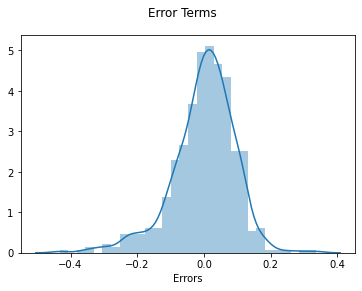

In [57]:
# Plotting the Residuals using the distplot

fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 30)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors') 
plt.show()

### Residual Inferences 
* The Residual/Error terms are pretty much normally distributed that we could see above.
* A right skew is also visible and kurtosis also can be seen from the plot.
* As the central limit theorem says when the sample increases, the distribution becomes normal. 

In [58]:
# Calculating the mean of residuals

Mean_of_residual = np.mean(y_train - y_train_count)
print("Mean of residual is", Mean_of_residual)

Mean of residual is -2.4666543317701273e-15


Mean of Residual value is ___-2.4666543317701273e-15___ which is equivalent to zero

### Heteroscadasticity Check

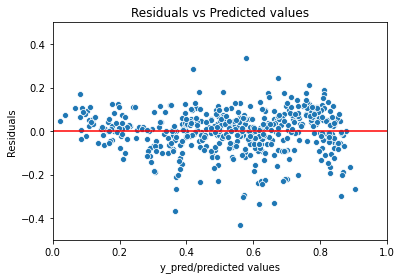

In [59]:
# Plotting the scatter plot with single line in order to check for Homoscadastocity

res = y_train - y_train_count
p = sns.scatterplot(y_train_count,res)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.5,0.5)
plt.xlim(0,1)
p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs Predicted values')
plt.show()

__Goldfeld Quandt Test__

For checking heteroscedasticity, we use Goldfeld Quandt test

__Null Hypothesis:__ Error terms are homoscedastic

__Alternative Hypothesis:__ Error terms are heteroscedastic.

In [60]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(res, X_train1)
print("F Statistics of the model is",lzip(name, test)[0][1])
print("P Value of the model is ",lzip(name,test)[1][1])

F Statistics of the model is 0.7566981246697965
P Value of the model is  0.9850605978634156


As per the above plot p value is more than 0.05 in Goldfeld Quandt Test, we cannot reject the null hypothesis that the error terms are homoscedastic in the model

In [61]:
# Taking the numerical variables alone in to account for scaling
numeric_variables = ['temperature', 'humidity', 'windspeed','casual','registered','count','adjustedTemperature']

# Applying the transform function to the numerical variables
test_set[numeric_variables] = scaler.transform(test_set[numeric_variables])

In [62]:
# Taking a look at the test_set post transformation

test_set.head()

,year,holiday,workingday,temperature,adjustedTemperature,humidity,windspeed,casual,registered,count,...,month_May,month_Nov,month_Oct,month_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
158,0,0,1,0.887692,0.846305,0.553372,0.235894,0.207385,0.534941,0.513184,...,0,0,0,0,0,1,0,0,0,0
712,1,0,0,0.241112,0.260449,0.579926,0.224374,0.131385,0.745308,0.654987,...,0,0,0,0,0,0,1,0,0,0
192,0,0,1,0.911681,0.862533,0.473181,0.366672,0.203077,0.516315,0.496426,...,0,0,0,0,0,0,0,0,0,0
282,0,1,0,0.619465,0.596921,0.695698,0.041051,0.465231,0.517326,0.597094,...,0,0,1,0,0,0,0,1,0,0
428,1,0,1,0.190954,0.188725,0.405735,0.425641,0.061846,0.449033,0.388023,...,0,0,0,0,0,0,0,0,0,1


In [63]:
# Descriptive Analysis of the test_set

test_set.describe()

,year,holiday,workingday,temperature,adjustedTemperature,humidity,windspeed,casual,registered,count,...,month_May,month_Nov,month_Oct,month_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.442922,0.022831,0.735160,0.502881,0.486352,0.551668,0.353371,0.245815,0.501930,0.501027,...,0.086758,0.082192,0.082192,0.063927,0.114155,0.200913,0.127854,0.127854,0.127854,0.164384
std,0.497869,0.149707,0.442259,0.248601,0.230258,0.194088,0.164581,0.214180,0.215919,0.219028,...,0.282125,0.275286,0.275286,0.245183,0.318728,0.401601,0.334692,0.334692,0.334692,0.371472
min,0.000000,0.000000,0.000000,-0.050062,-0.030556,-0.239512,0.041051,0.004000,0.057176,0.047932,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.291812,0.292904,0.400956,0.237185,0.076308,0.349480,0.356264,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.499526,0.495257,0.546838,0.329497,0.200308,0.500433,0.505918,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.725774,0.687031,0.698619,0.439760,0.326308,0.635287,0.637525,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.956385,0.931686,0.969106,0.815378,1.048615,0.977476,1.018634,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
# Filtering the predictor variable and assigning to y_test
y_test = test_set.pop('count')

# Assigning the rest of the variables to X_test with the following three columns excluded as did in the training set
X_test = test_set.drop(['adjustedTemperature','casual','registered'],axis=1)

In the above cell, for __X_test__ some columns such as _adjustedTemperature, casual_ and _registered_ which are redundant values dropped in order to build the perfect model

In [65]:
# Filtering the columns given by RFE with X_test
X_test1 = X_test[columns_rfe]

# Adding a constant along with all the variables
X_test_linear_model3 = sm.add_constant(X_test1)

# Droping the variable humidity as it is dropped during the model building process
X_test_linear_model3 = X_test_linear_model3.drop(['humidity'  , 'month_Nov' ], axis = 1)

# printing the final test data
X_test_linear_model3.head()

,const,year,holiday,temperature,windspeed,season_spring,season_winter,weatherSituation_Cloudy,weatherSituation_Rainy,month_Jul,month_Mar,month_Sep
158,1.0,0,0,0.887692,0.235894,0,0,0,0,0,0,0
712,1.0,1,0,0.241112,0.224374,0,1,0,0,0,0,0
192,1.0,0,0,0.911681,0.366672,0,0,0,0,1,0,0
282,1.0,0,1,0.619465,0.041051,0,1,0,0,0,0,0
428,1.0,1,0,0.190954,0.425641,1,0,0,0,0,1,0


In [66]:
# Predicting the y_pred from the model 2

y_pred_linear_model3 = linear_model3.predict(X_test_linear_model3)

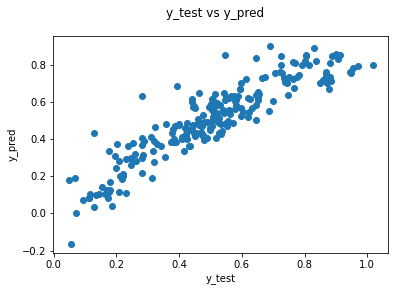

In [67]:
# Plotting the scatter plot of y_test and y_pred variables to see the model built efficiency

fig = plt.figure()
plt.scatter(y_test, y_pred_linear_model3)
fig.suptitle('y_test vs y_pred') 
plt.xlabel('y_test')
plt.ylabel('y_pred')     
plt.show()

## R2 Score

In [68]:
# Importing the r2_score library
from sklearn.metrics import r2_score

# Calculating the r2_score of test and predicted data
r2_score(y_test, y_pred_linear_model3)

0.8194035165296458

R2 values of both the training and testing dataset is as follows:
  
| Sets          | R Squared           | Adjusted R Squared  |
| ------------- |:-------------:| -----:|
| Training Set      | ___0.829___ | ___0.825___|
| Testing Set      | ___0.819___      |


## Root Mean Squared Error

To know about the Accuracy of the model built we use Root Mean Squared Error, the following snippet will give us RMSE

In [69]:
# Importing the mse and math
from sklearn.metrics import mean_squared_error
import math

# Applying the MSE with test and predicted values
mse = mean_squared_error(y_test, y_pred_linear_model3)

# Taking sqrt to get the RMSE from MSE
rmse = math.sqrt(mse)

print("Root Mean Squared Error value of the model built is",rmse)

Root Mean Squared Error value of the model built is 0.0928669107411903


As per the RMSE from the above value above, it is evident that the model performs better so is the accuracy score

In [70]:
# Evaluating the Features using the params parameter

linear_model3.params.sort_values(ascending= False)

temperature                0.433254
const                      0.289147
year                       0.239205
month_Mar                  0.059074
month_Sep                  0.048056
season_winter              0.042252
month_Jul                 -0.058658
holiday                   -0.069845
weatherSituation_Cloudy   -0.080456
season_spring             -0.138564
windspeed                 -0.144276
weatherSituation_Rainy    -0.299795
dtype: float64

## Conclusion and Recommendation

The Top Features that are contributing  significantly towards explaining the demand of the shared bikes are

| Features      | Values Contributed|
| ------------- |:-------------:|
|___temperature___|0.433254|
| ___year___ |0.239205|
| ___month_Mar___ |0.059074|
| ___month_Sep___ |0.048056|
| ___season_winter___ |0.042252|

And the equation of the best fit line can be written as follows:


$ y = 0.289147 + 0.433254 * (temperature)+ 0.239205 * (year) + 0.059074 * (Mar) + 0.048056 * (Sep) + 0.042252 * (winter) + (-0.058658) * (Jul) + (-0.069845) * (holiday) + (-0.080456) * (Cloudy) + (-0.138564) * (spring) + (-0.144276) * (windspeed) + (-0.299795) * (Rainy) $

The above linear equation is the final outcome of the model built, and it is clear that ___temperature , year , March month, September___ and ___Winter season___ are the top 5 featured that we have evaluated from this Linear Regression Model

If the company ___BoomBikes___ uses these variables effectively, then they can able to retain back their position as a top bike sharing company around the industry